# Problema 2
Load libraries

In [50]:
from scipy import stats
import numpy as np
import pandas as pd 
import math
import matplotlib.pyplot as plt
from random import seed

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

Now make the database

In [13]:
d1 = {'x1' : [0,1,0,1],'x2' : [0,0,1,1],'op_a' : [1,1,1,0],'op_b' : [0,0,0,1]}

In [17]:
df = pd.DataFrame.from_dict(d1)
df

,x1,x2,op_a,op_b
0,0,0,1,0
1,1,0,1,0
2,0,1,1,0
3,1,1,0,1


In [26]:
x_train = df.loc[:,['x1','x2']]
y_train = df.loc[:,['op_a','op_b']]
y_train_1 = df.loc[:,'op_a']
y_train_2 = df.loc[:,'op_b']

In [41]:
pred_1 = pd.DataFrame([1.001, 0, .001, 1])
pred_2 = pd.DataFrame([0, 1, 0, 1])
pred_3 = [0, 1, 1, 0]
pred_1

,0
0,1.001
1,0.000
2,0.001
3,1.000


In [43]:
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, **options)
    Split arrays or matrices into random train and test subsets
    
    Quick utility that wraps input validation and
    ``next(ShuffleSplit().split(X, y))`` and application to input data
    into a single call for splitting (and optionally subsampling) data in a
    oneliner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to the
        complement of the train size. If ``train_size`` is also Non

In [60]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df , pred_2, test_size=0.3)

We are ready to construct the model, we are going to use a neural network with keras. 

In [61]:
def nn_model():
    model = Sequential()
    model.add(Dense(60, activation='relu', input_shape=(x_train.shape[1],)))
    model.add(Dense(1))
    
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

model = nn_model()

Ajust model

In [62]:
resultados = model.fit( x_train,  y_train, validation_split=0.3, epochs=100, verbose=2)

Epoch 1/100
1/1 - 1s - loss: 1.1888 - mae: 1.0903 - val_loss: 5.0276e-07 - val_mae: 7.0906e-04
Epoch 2/100
1/1 - 0s - loss: 1.0586 - mae: 1.0289 - val_loss: 6.9048e-04 - val_mae: 0.0263
Epoch 3/100
1/1 - 0s - loss: 0.9722 - mae: 0.9860 - val_loss: 0.0024 - val_mae: 0.0486
Epoch 4/100
1/1 - 0s - loss: 0.9037 - mae: 0.9506 - val_loss: 0.0047 - val_mae: 0.0683
Epoch 5/100
1/1 - 0s - loss: 0.8455 - mae: 0.9195 - val_loss: 0.0074 - val_mae: 0.0861
Epoch 6/100
1/1 - 0s - loss: 0.7943 - mae: 0.8913 - val_loss: 0.0105 - val_mae: 0.1026
Epoch 7/100
1/1 - 0s - loss: 0.7483 - mae: 0.8650 - val_loss: 0.0140 - val_mae: 0.1181
Epoch 8/100
1/1 - 0s - loss: 0.7062 - mae: 0.8404 - val_loss: 0.0177 - val_mae: 0.1329
Epoch 9/100
1/1 - 0s - loss: 0.6673 - mae: 0.8169 - val_loss: 0.0216 - val_mae: 0.1470
Epoch 10/100
1/1 - 0s - loss: 0.6311 - mae: 0.7944 - val_loss: 0.0258 - val_mae: 0.1606
Epoch 11/100
1/1 - 0s - loss: 0.5971 - mae: 0.7727 - val_loss: 0.0302 - val_mae: 0.1738
Epoch 12/100
1/1 - 0s - loss:

Epoch 93/100
1/1 - 0s - loss: 4.2988e-13 - mae: 6.5565e-07 - val_loss: 0.4493 - val_mae: 0.6703
Epoch 94/100
1/1 - 0s - loss: 8.8818e-14 - mae: 2.9802e-07 - val_loss: 0.4493 - val_mae: 0.6703
Epoch 95/100
1/1 - 0s - loss: 0.0000e+00 - mae: 0.0000e+00 - val_loss: 0.4493 - val_mae: 0.6703
Epoch 96/100
1/1 - 0s - loss: 0.0000e+00 - mae: 0.0000e+00 - val_loss: 0.4493 - val_mae: 0.6703
Epoch 97/100
1/1 - 0s - loss: 0.0000e+00 - mae: 0.0000e+00 - val_loss: 0.4493 - val_mae: 0.6703
Epoch 98/100
1/1 - 0s - loss: 0.0000e+00 - mae: 0.0000e+00 - val_loss: 0.4493 - val_mae: 0.6703
Epoch 99/100
1/1 - 0s - loss: 0.0000e+00 - mae: 0.0000e+00 - val_loss: 0.4493 - val_mae: 0.6703
Epoch 100/100
1/1 - 0s - loss: 0.0000e+00 - mae: 0.0000e+00 - val_loss: 0.4493 - val_mae: 0.6703


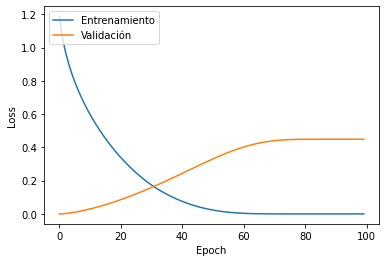

In [63]:
plt.plot(resultados.history['loss'])
plt.plot(resultados.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Entrenamiento', 'Validación'], loc='upper left')
plt.show()

In [64]:
test_mse_score, test_mae_score = model.evaluate(x_test, y_test)
test_mae_score

1/1 [==============================] - 0s 17ms/step - loss: 0.2802 - mae: 0.5216


0.5215883255004883

In [65]:
x_train

,x1,x2,op_a,op_b
1,1,0,1,0
0,0,0,1,0


In [66]:
predicciones = model.predict(x_train)
print(predicciones)

[[0.9999999]
 [0.6703211]]


In [ ]:
import numpy as np
    from keras.models import Sequential
    from keras.layers.core import Dense
    training_data = np.array([[0,0],[0,1],[1,0],[1,1]], "float32")
    target_data = np.array([[0],[1],[1],[0]], "float32")
    model = Sequential()
    model.add(Dense(16, input_dim=2, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='mean_squared_error',
    optimizer='adam',
    metrics=['binary_accuracy'])
    model.fit(training_data, target_data, epochs=1000)
    scores = model.evaluate(training_data, target_data)
    print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    print (model.predict(training_data).round())
    
    def nn_model():
    model = Sequential()
    model.add(Dense(16, input_dim=2, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(loss='mean_squared_error',optimizer='adam',metrics=['binary_accuracy'])
    return model

model = nn_model()